In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\vamsh\OneDrive\NARESHIT\EDA_PYTHON\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Bi variate analysis**

- analyse the two variables
- two categorical columns
- two numerical columns
- one categorical and one numerical

**categorical vs categorical**

In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
visa_df.select_dtypes(include='object').columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Continent and case status**

In [6]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Q1:How many asia people got the visa certified**
**Q2:How many asia people got the visa Denied**

In [8]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1 & con2
len(visa_df[con])
print(f'the number of employes got visa certifies are: {len(visa_df[con])}')

the number of employes got visa certifies are: 11012


In [9]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Denied'
con=con1 & con2
len(visa_df[con])
print(f'the number of employes got visa certifies are: {len(visa_df[con])}')

the number of employes got visa certifies are: 5849


In [10]:
keys=visa_df['continent'].unique()
denied_list=[]
certified_list=[]
for i in keys:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certified_con=con1&con2
    denied_con=con1&con3
    denied_list.append(len(visa_df[denied_con]))
    certified_list.append(len(visa_df[certified_con]))
    
denied_list,certified_list

([5849, 154, 1255, 775, 359, 70], [11012, 397, 2037, 2957, 493, 122])

In [11]:
pd.DataFrame(zip(denied_list,certified_list),
            columns=['Denied','Certified'],
             index=keys)

,Denied,Certified
Asia,5849,11012
Africa,154,397
North America,1255,2037
Europe,775,2957
South America,359,493
Oceania,70,122


**Cross tab**

- first argument: index
- second argument: column

In [12]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result2=pd.crosstab(col2,col1)

<Axes: xlabel='continent'>

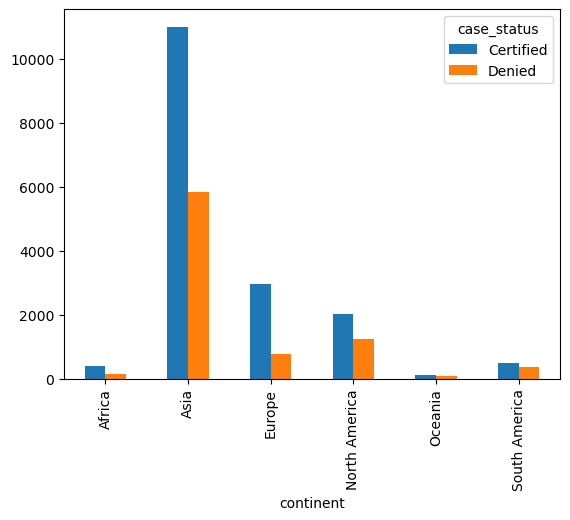

In [13]:
result1.plot(kind='bar')

<Axes: xlabel='case_status'>

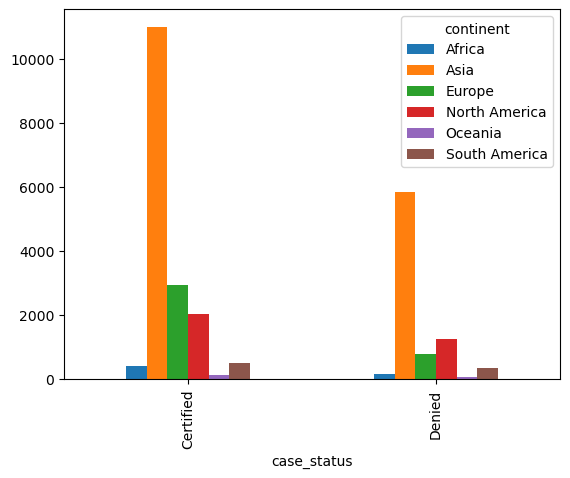

In [14]:
result2.plot(kind='bar')

In [15]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result1=pd.crosstab(col,col3)
result2=pd.crosstab(col3,col)

<Axes: xlabel='continent,education_of_employee'>

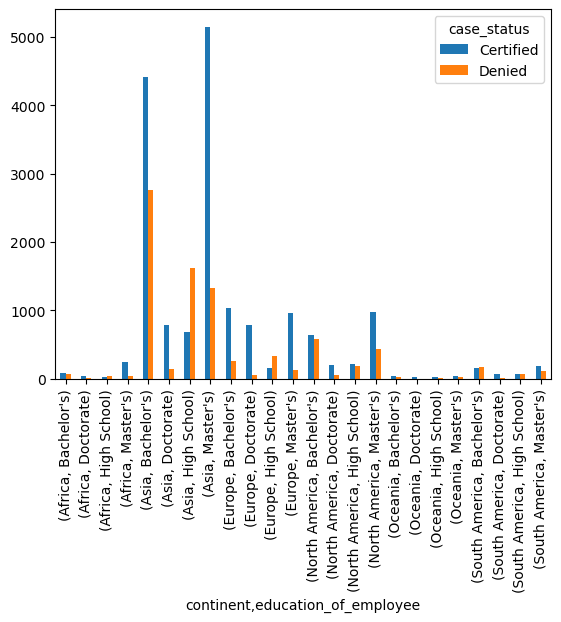

In [16]:
result1.plot(kind='bar')

<Axes: xlabel='case_status'>

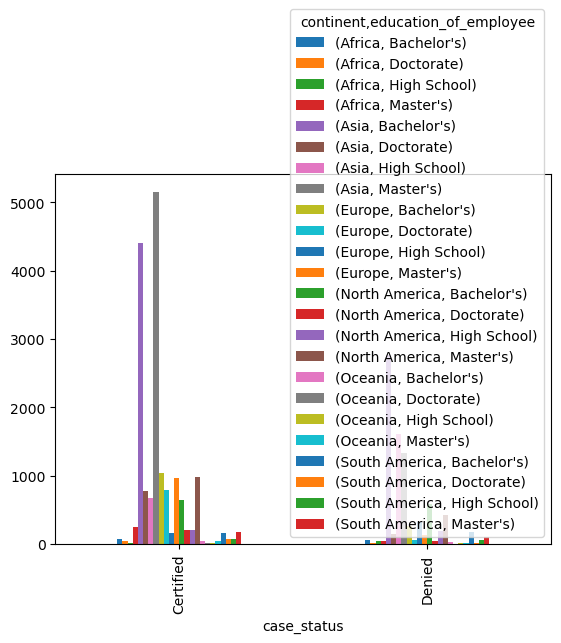

In [17]:
result2.plot(kind='bar')

**NUmerical-Numerical**

- in order to plot numerical vs numerical we need to use scatter plots
- scatter plots will give relation between two numerical columns
- It is under matplotlib

**plt.scatter**

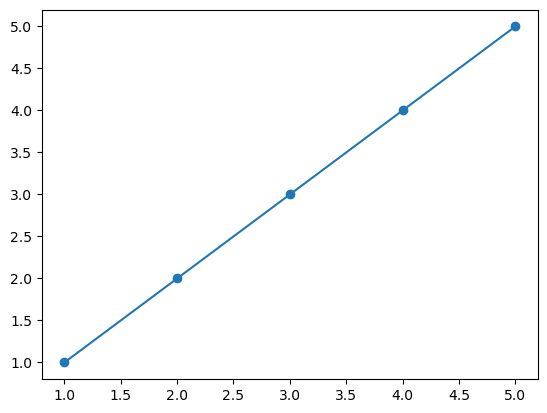

In [18]:
# y=x graph
x=[1,2,3,4,5]
y=[1,2,3,4,5]
# it is y=x plot
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

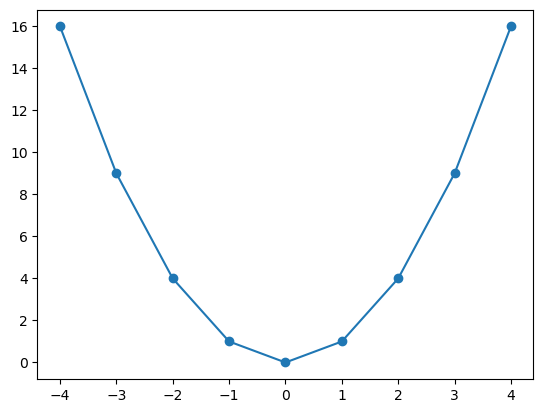

In [19]:
x=[i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [20]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**scatter_plot-1**

- no_of_employees and yr_of_estab

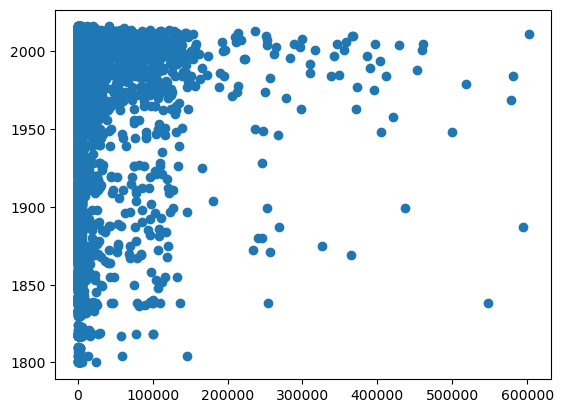

In [21]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)
plt.show()

In [22]:
observation:No relation

SyntaxError: invalid syntax (1369442951.py, line 1)

**scatter_plot-2**

no_of_employees and prevailing_wage

In [ ]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

In [ ]:
col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

In [ ]:
plt.figure(figsize=(14,3))

col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)


col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)

col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,3).scatter(col1,col2)

**corelation coefficient**

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="22" data-atf="0">

- pearson correlation coefficient will give the amount of relation between variables
- it is denoted with r
- r varies from -1 to 1
- for posv relation r varies from 0 to 1
- for neg relation r varies from -1 to 0
- for no relation r approximate 0
- in python code we have **corr** function under pandas
    - this will give covariance matrix
    - we already discussed covariance matrix is rows and columns type
    - in this data we have 3 numerical columns
    - so we will get 3*3 9 values
    - All trace of the matrix  represent variance
    - upper triangle and lower triangle represents covariance

In [ ]:
visa_df.corr(numeric_only=True)

**observations**

- the correlation value between no_of employees and yr_of_estb approx zero
    - which indicate no relation
- the correlation value between no_of employees and prevailing_wage approx zero
    - which indicates no relation
- the correlation value between no_of employees and prevailing_wage approx zero
    - which indicates no relation

**what happen if correlation is high**
- for that we will read wine quality dataset
- will perform the corr

In [24]:
wine_data=pd.wine_data=pd.read_csv(r"C:\Users\vamsh\OneDrive\NARESHIT\EDA_PYTHON\winequality_red - winequality_red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
wine_data=wine_data.drop_duplicates()
wine_data.iloc[1:,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [26]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
len(wine_data.columns)

12

In [28]:
#correlation 12
#12*12=144
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**Heat Map**
- Heat map will provide the matrix representation of correlation value
- heat map represents values in color format
- different values in different colours
- beside matrix it will display color bar
- colour bar means like a scale of values with colour
- it is under seaborn package

<Axes: >

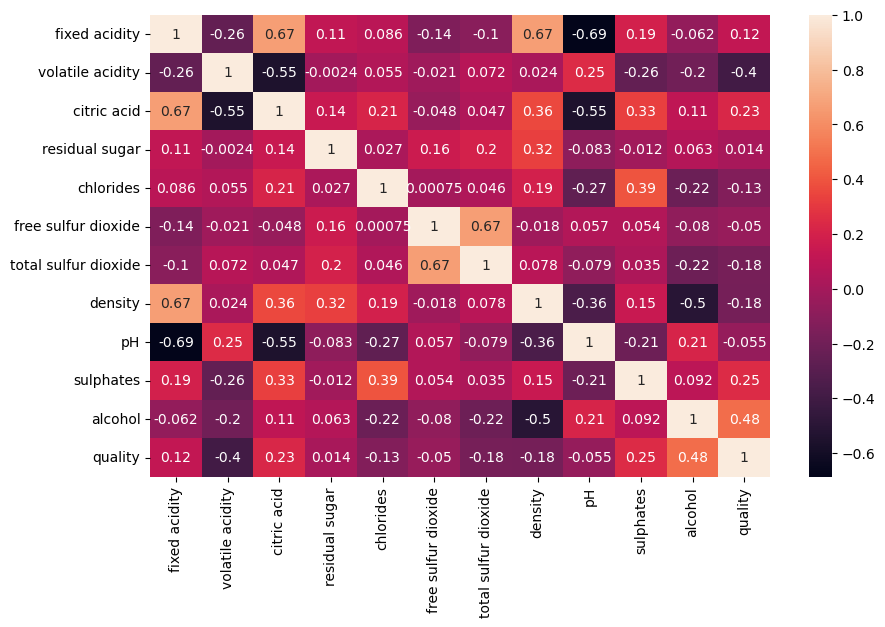

In [32]:
wine_corr=wine_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True)

In [34]:
visa_df=pd.read_csv(r"C:\Users\vamsh\OneDrive\NARESHIT\EDA_PYTHON\Visadataset - Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<Axes: >

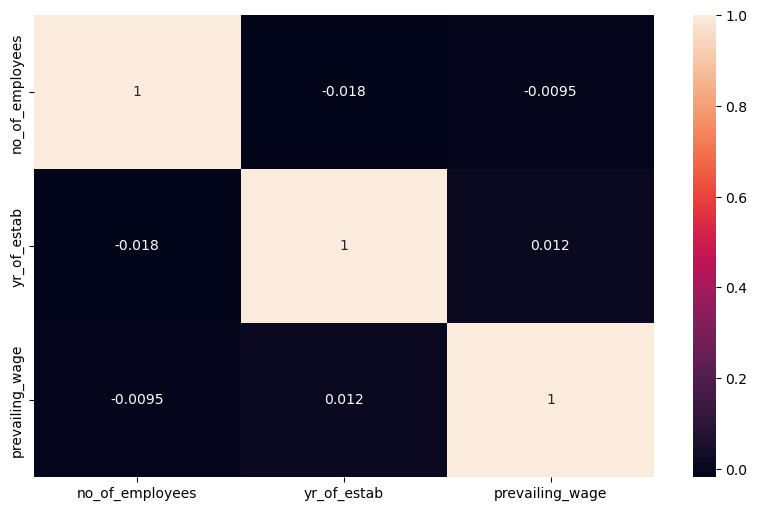

In [38]:
visa=visa_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(visa,annot=True)

In [39]:
# draw the scatter plot for wine data columns
# which is having highest positive correlation
# which is having lowest negative correlation

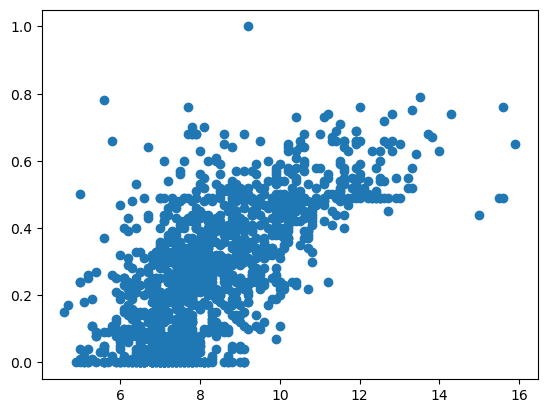

In [40]:
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.scatter(col1,col2)
plt.show()

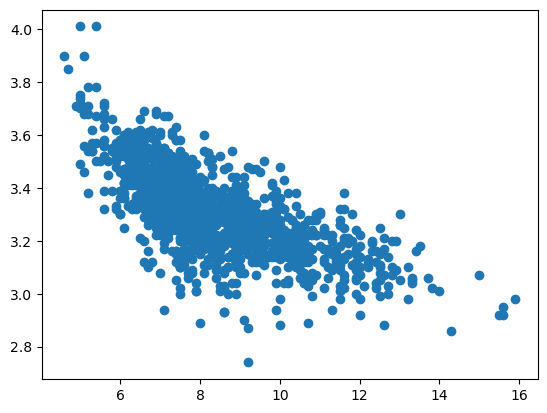

In [43]:
col1=wine_data['fixed acidity']
col2=wine_data['pH']
plt.scatter(col1,col2)
plt.show()

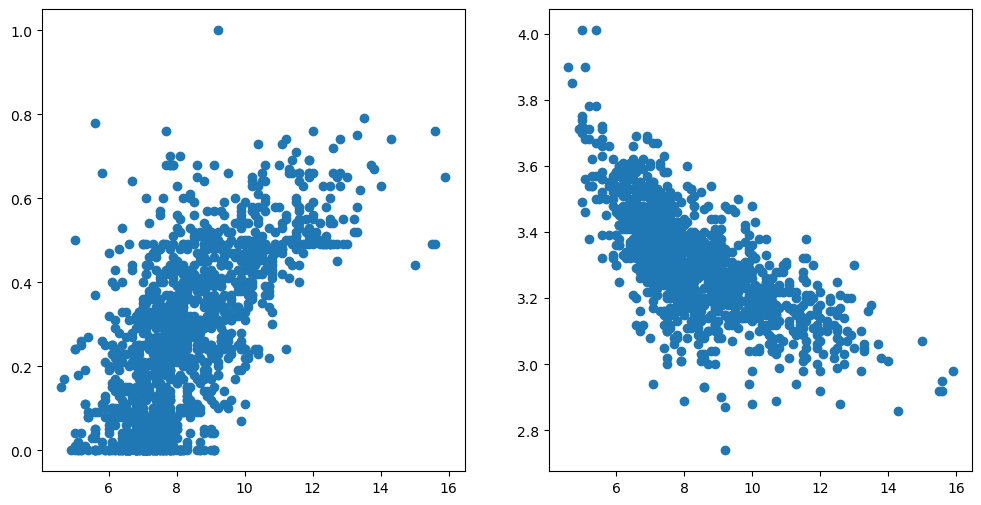

In [52]:
plt.figure(figsize=(12,6))
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
col3=wine_data['pH']
plt.subplot(1,2,1).scatter(col1,col2)
plt.subplot(1,2,2).scatter(col1,col3)
plt.show()